In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


importing libaries


In [70]:
import pandas as pd


importing dataset

In [71]:
data =pd.read_csv('/content/drive/MyDrive/heart.csv')

Taking care of missing values 

In [72]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Taking care of duplicate values

In [73]:
data_dup = data.duplicated().any()

In [74]:
data_dup

True

In [49]:
data = data.drop_duplicates()

In [75]:
data_dup = data.duplicated().any()

In [51]:
data_dup

False

Data preprocessing

In [76]:
cate_val=[]
cont_val=[]
for column in data.columns:
  if data[column].nunique() <=10:
    cate_val.append(column)
  else:
      cont_val.append(column)

In [77]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [78]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Encoding the categorical Data

In [79]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [81]:
data['cp'].unique()

KeyError: ignored

In [80]:
 cate_val.remove('sex')
 cate_val.remove('target')
 data = pd.get_dummies( data,columns=cate_val,drop_first=True)

In [82]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


Feature Scaling

In [83]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [84]:
 from sklearn.preprocessing import StandardScaler

In [85]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [86]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.268437,1,-0.377636,-0.659332,0.821321,-0.060888,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.158157,1,0.479107,-0.833861,0.255968,1.727137,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.716595,1,0.764688,-1.396233,-1.048692,1.301417,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.724079,1,0.936037,-0.833861,0.516900,-0.912329,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.834359,0,0.364875,0.930822,-1.874977,0.705408,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


Spliting  The dataset Into The Training Set and Test Set

In [92]:
X = data.drop('target',axis=1)

In [93]:
Y = data['target']

In [94]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [99]:
Y_train

835    0
137    1
534    1
495    1
244    1
      ..
700    1
71     0
106    0
270    1
860    0
Name: target, Length: 820, dtype: int64

In [100]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
835,-0.599275,1,-0.777449,-1.881036,-1.005203,-0.231177,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
137,1.054918,0,2.763755,1.531978,0.212479,-0.912329,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
534,-0.047877,0,-1.348611,0.407235,0.777832,-0.912329,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
495,0.503520,1,0.193526,-0.232705,0.516900,-0.486609,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
244,-0.378716,1,-0.377636,-0.019392,0.734343,1.131129,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-1.481512,1,-0.092055,-0.620548,0.821321,0.790552,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
71,0.724079,1,0.479107,-0.756293,-0.483339,0.705408,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
106,-0.378716,1,0.479107,1.027782,1.038764,0.449976,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
270,-1.260953,1,-1.234378,-0.678724,0.516900,-0.912329,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [102]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
527,0.834359,0,-0.434752,-0.717508,0.603877,-0.912329,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
359,-0.158157,0,-0.206287,-0.581764,-1.483579,-0.912329,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
447,0.062402,1,1.621431,0.833861,-0.178919,-0.231177,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
31,-0.488996,0,-0.663216,-0.038784,0.560389,0.024256,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
621,-0.709555,1,-0.092055,0.193921,0.038525,-0.912329,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,1.496036,1,-0.777449,0.601156,0.082013,-0.060888,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
796,-1.481512,1,0.193526,-0.833861,-0.744271,-0.912329,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
644,-1.150673,1,-0.663216,-0.387842,0.864809,-0.912329,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
404,0.724079,1,0.479107,-0.756293,-0.483339,0.705408,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1


In [103]:
Y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

Logistic Regression

In [104]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.268437,1,-0.377636,-0.659332,0.821321,-0.060888,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.158157,1,0.479107,-0.833861,0.255968,1.727137,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.716595,1,0.764688,-1.396233,-1.048692,1.301417,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.724079,1,0.936037,-0.833861,0.516900,-0.912329,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.834359,0,0.364875,0.930822,-1.874977,0.705408,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
log = LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [108]:
Y_pred1 = log.predict(X_test)

In [110]:
from sklearn.metrics import accuracy_score 

In [112]:
accuracy_score( Y_test,Y_pred1)

0.8195121951219512

Support vector classifiers

In [113]:
 from sklearn import svm

In [115]:
svm = svm.SVC()

In [117]:
svm.fit(X_train,Y_train)

SVC()

In [119]:
Y_pred2 = svm.predict(X_test)

In [120]:
accuracy_score(Y_test,Y_pred2)

0.8731707317073171

KNN

In [131]:
from sklearn.neighbors import KNeighborsClassifier

In [132]:
knn = KNeighborsClassifier()

In [130]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [129]:
 Y_pred3 = knn.predict(X_test)

In [125]:
accuracy_score(Y_test,Y_pred3)

0.7902439024390244

Decision Tree

In [128]:
from sklearn.tree import DecisionTreeClassifier 

In [133]:
dt = DecisionTreeClassifier()

In [134]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [135]:
Y_pred4 = dt.predict(X_test)

In [137]:
accuracy_score(Y_test,Y_pred4)

1.0

Random forest Classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
 rf = RandomForestClassifier() 

In [141]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [143]:
Y_pred5=rf.predict(X_test)

In [145]:
accuracy_score(Y_test,Y_pred5)

1.0

In [146]:
from sklearn.naive_bayes import GaussianNB

In [147]:
gnb= GaussianNB()

In [148]:
gnb.fit(X_train,Y_train)

GaussianNB()

In [150]:
Y_pred6=rf.predict(X_test)

In [151]:
accuracy_score(Y_test,Y_pred5)

1.0

In [156]:
final_data =pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','NB'],
                          'ACC':[accuracy_score(Y_test,Y_pred1),
                                 accuracy_score(Y_test,Y_pred2),
                                 accuracy_score(Y_test,Y_pred3),
                                 accuracy_score(Y_test,Y_pred4),
                                 accuracy_score(Y_test,Y_pred5),
                                 accuracy_score(Y_test,Y_pred6)]})

In [157]:
  final_data

,Models,ACC
0,LR,0.819512
1,SVM,0.873171
2,KNN,0.790244
3,DT,1.000000
4,RF,1.000000
5,NB,1.000000


In [158]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


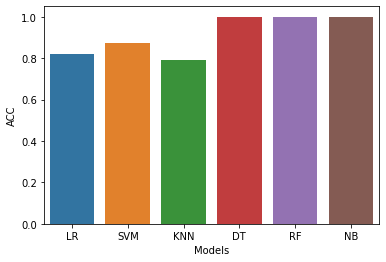

In [164]:
sns.barplot(final_data['Models'],final_data['ACC'])